### The enviroment is python 3.7.9 and tensorflow 1.15.0
### This is an exemplary codepiece used to check similarity between the given verbs and a pre-set verb list. given verbs: install, lift, insert, connect; a pre-set verb list: {pick,drop,push,pull,rotate,move,place}. The similarity threshold is set as 0.5. The language model is the [Universal Sentence Encoder](https://research.google/pubs/universal-sentence-encoder/).

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[0.9999998  0.5076421  0.42777082 0.4938481  0.38150734 0.4079501
  0.55846685 0.30573624 0.3291198  0.48501801 0.41655177]
 [0.5076421  1.0000002  0.6071931  0.75766104 0.54871875 0.48549142
  0.57336223 0.35810494 0.49814755 0.526453   0.4465851 ]
 [0.42777082 0.6071931  1.         0.74845445 0.56600696 0.49913624
  0.61150527 0.42621633 0.61261296 0.5208869  0.46939155]
 [0.4938481  0.75766104 0.74845445 1.0000002  0.61913145 0.53803843
  0.5877872  0.44642517 0.59311306 0.62333107 0.4763012 ]
 [0.38150734 0.54871875 0.56600696 0.61913145 0.9999999  0.4688564
  0.5640711  0.45703387 0.48334002 0.51680946 0.4902436 ]
 [0.4079501  0.48549142 0.49913624 0.53803843 0.4688564  1.0000002
  0.59937215 0.42760313 0.40505844 0.32241645 0.43943858]
 [0.55846685 0.57336223 0.61150527 0.5877872  0.5640711  0.59937215
  0.9999999  0.36937994 0.5320069  0.5278185  0.5833044 ]
 [0.30573624 0.35810494 0.42621633 0.44642517 0.45703387 0.42760313
  0.36937994 1.         0.37330115 0.4344703  0.53543

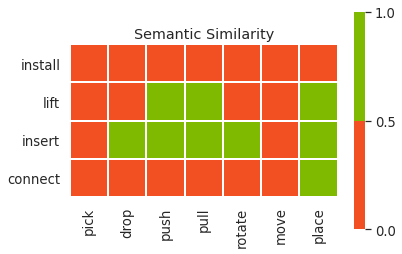

In [30]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import BoundaryNorm, ListedColormap
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
embed = hub.Module(module_url)

def plot_similarity(labels, features):
  sim_cos = cosine_similarity(features, features)
  #some variational similarity calculations would also work
  print(sim_cos)
  sns.set(font_scale=1.2)
  sim_colors = ['#F25022', '#7FBA00']
  sim_cmap = ListedColormap(sim_colors)
  bounds = [0, 0.50, 1]
  sim_norm = BoundaryNorm(bounds, ncolors=len(sim_colors))
  g = sns.heatmap(
      sim_cos[7:,:7],
      yticklabels=labels[7:],
      xticklabels=labels[:7],
      vmin=0,
      vmax=1,
      cmap=sim_cmap,
      norm=sim_norm,
      linewidths=1, 
      linecolor='white',
      square=True)
  g.set_xticklabels(labels[:7], rotation=90)
  g.set_title("Semantic Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_)
messages = [
    "pick",
    "drop",
    "push",
    "pull",
    "rotate",
    "move",
    "place",
    "install",
    "lift",
    "insert",
    "connect"

]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

### If one row is fully orange, then the corresponding verb does not satisfy the requirement and needs further decomposition. such as "install" here.